In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a_opt_methods import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a_opt_methods import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases_opt_methods import *

%matplotlib inline 
plt.rcParams['figure.figsize'] = (7.0, 4.0) #setting default size of plots.
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Revisiting our update_parameters method in gradient descent

In [13]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    
    L = len(parameters) //2
    for l in range(L):
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW"+ str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db"+str(l+1)]
        
    return parameters

In [14]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()
print(str(parameters)+'\n')
parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print(parameters)

{'W1': array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ]]), 'b1': array([[ 1.74481176],
       [-0.7612069 ]]), 'W2': array([[ 0.3190391 , -0.24937038,  1.46210794],
       [-2.06014071, -0.3224172 , -0.38405435],
       [ 1.13376944, -1.09989127, -0.17242821]]), 'b2': array([[-0.87785842],
       [ 0.04221375],
       [ 0.58281521]])}

{'W1': array([[ 1.63535156, -0.62320365, -0.53718766],
       [-1.07799357,  0.85639907, -2.29470142]]), 'b1': array([[ 1.74604067],
       [-0.75184921]]), 'W2': array([[ 0.32171798, -0.25467393,  1.46902454],
       [-2.05617317, -0.31554548, -0.3756023 ],
       [ 1.1404819 , -1.09976462, -0.1612551 ]]), 'b2': array([[-0.88020257],
       [ 0.02561572],
       [ 0.57539477]])}


In [15]:
def stochastic_gd(X, Y, layer_dim, learning_rate = 0.5, num_iterations = 1000):
    
    parameters = initialize_parameters(layer_dims)
    for i in range(num_iterations):
        for j in range(0,m):
            
            a, caches = forward_propagation(X[:,j], parameters)
            cost += compute_cost(a, Y[:, j])
            grads = backward_propagation(a, caches, parameters)
            
            parameters = update_parameters(parameters, grads)

for a large dataset (train_set ofcourse) SGD can be faster , but the parameters will oscillate toward the minimum rather than converge smoothly

Implementing SGD requires 3 loops

1. Over the num_iterations
2. Over the m training_examples
3. Over the layers(to update all parameters) from (W1, b1) to (Wl, bL)

Points to remember 

1. Stochastic, batch, mini-batch gradient descent differ from each other in the number of examples used.
2. we need to tune a learning_rate hyperparameter alpha.
3. With a well tuned mini-batch size it usually outperforms batch gradient descent and stochastic gradient descent.(particularly when the training set is large) 

### 2. Mini batch Gradient descent

Building mini-batches from training_set(X, Y)

Two steps into building a mini-batch

1. Shuffle: 

create a shuffled version of the training set.make sure the random shuffling is done synchronously between X and Y. such that upon reshuffling the ith column of 'X' is the example corresponding to ith label in Y.

Shuffling would ensure that mini-batches are constructed from random examples taken together.( it nullifies any bias originating from creating mini-batches from the origin..( complete it )

2. Partioning: ( there is a proper algorithm for it )

to fill the mini_batches according to the mini_batch_size.




In [16]:
78/4, 78//4, 78%4

# first calculation is when we want 78 to be divided into 4 equal groups.(groups mightnot have integeral size)

# second calculation is when we want 78 to be divided into groups of 4.(you may have some elements not being a part of any group)

# third calculation is when we want to see number of elements left that couldnot be included in the above groups formed. 

(19.5, 19, 2)

In [17]:
math.floor(78/4)

19

The last mini_batch_size might end up smaller than the mini_batch_size

In [18]:
permutation = list(np.random.permutation(10))
permutation

[2, 5, 4, 0, 3, 6, 1, 9, 7, 8]

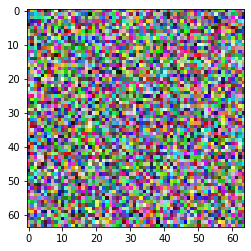

In [19]:
#image generated from random integer values.
rnd_img = np.random.choice(256,size = (64,64,3))
rnd_img = rnd_img/255
plt.imshow(rnd_img)

In [20]:

complete_mini_batches = m/minibatch_size 

NameError: name 'm' is not defined

In [21]:
permutations = list(np.random.permutation(89))
Y = np.random.random((1,89))
Y[:, permutations].shape

(1, 89)

In [22]:
permutations = np.random.permutation(19)
permutations

array([12, 16,  6,  1,  9,  2, 17, 18, 13,  0,  4,  3,  7, 14,  5,  8, 10,
       15, 11])

In [23]:
my_list = []

img1 = np.random.randn(12288,1)
img2 = np.random.randn(12288,1)
img3 = np.random.randn(12288,1)

my_list.append(img1)
my_list.append(img2)
my_list.append(img3)

img_matrix = []
img_matrix.append(img1)
img_matrix.append(img2)
img_matrix.append(img3)

a = np.empty(shape = (12288,0))
for i in range(3): # now you can have as many individual images, and then add them into your vector like 2D array 'a'
    a = np.append(a, my_list[i], axis = 1)

a.shape

(12288, 3)

In [24]:
my_list[2].shape

(12288, 1)

In [25]:
my_list2 = []
num = 19//3

for k in range(0, num):
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-25-00621d2598ff>, line 6)

In [26]:
m = 19
mini_bs = 6
batches = []
num_complete_batches = 19//mini_bs


In [27]:
num_complete_batches

3

In [67]:
def random_mini_batches(X, Y, mini_batch_size, seed =0):
    
    np.random.seed(seed)
    m = X.shape[1] #number of examples in the training set.
    mini_batches = [] #a list of tuples. in each tuple there is a X and Y.
    
    #Step 1.
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation] #imgs corresponding to numbers in the permutation list -- all stashed in a matrix is returned
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    #step 2. partition (Shuffled_x, Shuffled_y)
    num_complete_mini_batches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_mini_batches):
        
        mini_batch_X = shuffled_X[:, k* mini_batch_size : (k+1)* mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k* mini_batch_size : (k+1)* mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        
        mini_batches.append(mini_batch)
        
    if m % mini_batch_size!=0:
        
        last_mini_batch_size = m - mini_batch_size*math.floor(m/mini_batch_size)
        
        mini_batch_X = shuffled_X[:, k* mini_batch_size: k* mini_batch_size + last_mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k* mini_batch_size: k* mini_batch_size + last_mini_batch_size] 
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [68]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
#X_assess.shape, Y_assess.shape
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)
mini_batches[0][0][0][0:3] #wth is sanity checking ?

array([ 0.90085595, -0.7612069 ,  0.2344157 ])

Shuffling and partitioning are the two steps required to build mini-batches
powers of two are often chosen to be the mini-batch size eg-16,32, 64, 128

In [115]:
def initialize_velocity(parameters):
    
    L = len(parameters) // 2
    v = {}
    for l in range(L):
        
        W = parameters["W"+ str(l+1)]
        b = parameters["b"+ str(l+1)]
        
        v["dW" + str(l+1)] = np.zeros((W.shape[0], W.shape[1]))
        v["db" + str(l+1)] = np.zeros((b.shape[0], b.shape[1]))
    
    return v

In [155]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    
    L = len(parameters) // 2
    
    for l in range(L):
        
        v["dW" + str(l+1)] = beta*v["dW" + str(l+1)] + (1-beta)* grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta*v["db" + str(l+1)] + (1-beta)* grads["db" + str(l+1)]
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v["db" + str(l+1)]
        
    return parameters, v

In [157]:
parameters, grads, v = update_parameters_with_momentum_test_case()
print("type to the function" + str(type(parameters)))
parameters, v = update_parameters_with_momentum(parameters, grads, v, 0.9, 0.0007)
print("type out of the function" + str(type(parameters)))

type to the function<class 'dict'>
type out of the function<class 'dict'>


In [148]:

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)

print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = v" + str(v["db2"]))

W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[0.02344157]
 [0.16598022]
 [0.07420442]]


The velocity is initialized with zeros so it will take a few iterations to "build up" velocity and start to take bigger steps.

if $\beta = 0$ then it just becomes standard gradient descent without momentum


**How to choose $\beta$ ?**

-> the larger the momentum $\beta$ is, the smoother the update because the more we take the past gradients into account. But if $\beta$ is too big, it could also smooth out the update too much.

-> common values or $\beta$ range from 0.8 to 0.999. $\beta$ = 0.9 is a reasonable default if you dont require tuning

-> tuning the optimal $\beta$ for your model might need trying several values to see what works best in terms of reducing the value of the cost function $J$.



**Points to remember: **

-> Momentum takes past gradients into account to smooth out the steps of the gradient descent.It can be applied with batch gradient descent, mini_batch gradient descent or stochastic gradient descent.

-> We need to tune a momentum hyperparameter $\beta$ and a learning rate $\alpha$. 

### 4. Adam 


**Adam** is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp and momentum.

**How it Works ?**

1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction).

2. It calculates an exponentially weighted average of the squares of the past gradients, and stores it in variables $s$ (before bias correction) and $s{corrected}$ (with bias correction)

3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for l = 1,..... L



$v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } $

$v_{dW^{[l]}}^{corrected} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\ $

$s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 $

$s_{dW^{[l]}}^{corrected} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} $

$W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon} $


where:

- t counts number of steps taken of Adam
- L is the number of layers
- $\beta1$ and $\beta2$ are the hyperparameters that control the two exponentially weighted averages.
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to prevent division from zero

We will store all the parameters in the parameters dictionary





###### initializing the parameters $s$ and $v$ that keep track of the past information

In [138]:
def initialize_adam(parameters):
    
    L = len(parameters) //2
    v = {}
    s = {}
    
    for l in range(L):
        
        W = parameters["W" + str(l+1)]
        b = parameters["b" + str(l+1)]
        
        v["dW" + str(l+1)] = np.zeros((W.shape[0], W.shape[1]))
        v["db" + str(l+1)] = np.zeros((b.shape[0], b.shape[1]))
        
        s["dW" + str(l+1)] = np.zeros((W.shape[0], W.shape[1]))
        s["db" + str(l+1)] = np.zeros((b.shape[0], b.shape[1]))
        
    return s, v

In [139]:
parameters = initialize_adam_test_case()
s, v = initialize_adam(parameters)

print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

v["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]


### implementing parameters update with Adam

**Formulas**

$v_{W^{[l]}} = \beta1 v_{W^{[l]}} + (1- \beta1) \frac{\partial J}{\partial W^{[l]}} $ 

$v_{W^{[l]}}^{corrected} = \frac {v_{W^{[l]}}}{1-(\beta_{1})^{t}}$

$s_{W^{[l]}} = \beta_{2}s_{W^{[l]}} + (1-\beta_{2})(\frac {\partial J}{\partial W^{[l]}})^{2} $

$s_{W^{[l]}}^{corrected} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\ $

$W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon} $



In [140]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    
    L = len(parameters) //2 #number of layers in neural networks
    v_corrected = {}
    s_corrected = {}
    
    for l in range(L):
        
        v["dW" + str(l+1)] = beta1* v["dW" + str(l+1)] + (1-beta1)*grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1* v["db" + str(l+1)] + (1-beta1)*grads["db" + str(l+1)]
        
        #computing bias corrected first moment estimate
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1- np.power(beta1,t))
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/ (1- np.power(beta1,t))
        
        #moving average of the sqaured gradients. Inputs:"s, grads, beta2". output:"s".
        s["dW" + str(l+1)] = beta2* s["dW" + str(l+1)] + (1-beta2)* np.square(grads["dW" + str(l+1)])
        s["db" + str(l+1)] = beta2* s["db" + str(l+1)] + (1-beta2)* np.square(grads["db" + str(l+1)])
        
        #compute bias corrected second raw moment estimate
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1-np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1-np.power(beta2, t))
        
        #update parameters. Inputs:"parameters, learning_rate, v_corrected, s_corrected, epsilon" Output:"parameters"
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate* v_corrected["dW" + str(l+1)] / np.sqrt(s_corrected["dW" + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate* v_corrected["db" + str(l+1)] / np.sqrt(s_corrected["db" + str(l+1)] + epsilon)

    return parameters, v, s

In [141]:
parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t=2)

print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1 \"] = \n" + str(v["dW1"]))
print("v[\"dW2 \"] = \n" + str(v["dW2"]))
print("v[\"db1 \"] = \n" + str(v["db1"]))
print("v[\"db2 \"] = \n" + str(v["db2"]))
print("s[\"dW1 \"] = \n" + str(s["dW1"]))
print("s[\"dW2 \"] = \n" + str(s["dW2"]))
print("s[\"db1 \"] = \n" + str(s["db1"]))
print("s[\"db2 \"] = \n" + str(s["db2"]))

W1 = 
[[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = 
[[ 1.75225313]
 [-0.75376553]]
W2 = 
[[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = 
[[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1 "] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["dW2 "] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db1 "] = 
[[-0.01228902]
 [-0.09357694]]
v["db2 "] = 
[[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1 "] = 
[[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["dW2 "] = 
[[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db1 "] = 
[[1.51020075e-05]
 [8.75664434e-04]]
s["db2 "] = 
[[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


Three working optimization algorithms are ready to put to use and see what effect does it make.



#### 5. Model with different Optimization Algorithms


We will use the moons dataset to test the different "optimization" methods."
the dataset is named "moons" as data from each of the two classes looks a bit like a crescent shaped moon.

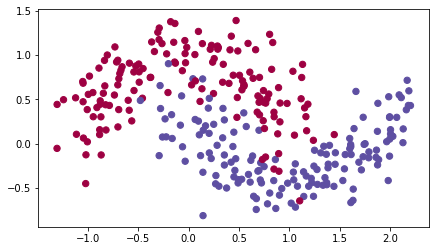

In [142]:
train_X, train_Y = load_dataset()

We will train our already implemented 3-layer-neural network with

**Mini batch gradient Descent** 
-- it calls the function update_parameters_with_gd()

**Mini batch momentum**
--it calls the functions -initialize_velocity() and update_parameters_with_momentum()

**Mini batch Adam**
--it calls initialize_adam() and update_parameters_with_adam()

In [ ]:
parameters = initialize_parameters([2, 5, 2, 1])
parameters["W1"]

In [180]:
def model(X, Y, layer_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    
    L = len(layer_dims) #number of layers in the neural network including the input layer.
    costs = []
    t = 0 #initializing the counter required for parameter update
    seed = 10
    m = X.shape[1]
    
    parameters = initialize_parameters(layer_dims)
  
    #Initialize the optimizer
    if optimizer == "gd":
        pass
        
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
        
    elif optimizer == "adam":
        s, v = initialize_adam(parameters)
        
    for i in range(num_epochs):# in each epoch we go through all the mini_batches 
        
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:# each index of minibatches contain a minibatch
            
            (mini_batch_X, mini_batch_Y) = minibatch #gets you the input data
            
            A3, cache = forward_propagation(mini_batch_X, parameters) #Forwardprop
            cost_total += compute_cost(A3, mini_batch_Y) #Compute loss
            grads  = backward_propagation(mini_batch_X, mini_batch_Y, cache) #Backprop

            #Parameter update step
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)

            if optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)

            if optimizer == "adam":
                t = t+1 #adam counterslpm
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate,
                                                        beta1, beta2, epsilon)

        cost_avg = cost_total / m #this avg cost is analogous to the cost computed in batch gd

        if print_cost and i % 1000 == 0:
            print("Cost after epoch %i: %f" %(i, cost_avg))
        if  i % 100 ==0:
            costs.append(cost_avg) #for 1000 iterations, we will have 1000 costs.
              
    #plot the cost
    plt.plot(costs)
    plt.ylabel('Cost')                                            
    plt.xlabel('epochs (per 100)')
    plt.title('Learning_rate = ' + str(learning_rate))
    plt.show()
    
    return parameters

Running the code above for each of the optimization algorithms

In [166]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=reduce(operator.add, y), cmap=plt.cm.Spectral)
    plt.show()

Cost after epoch 0: 0.702378
Cost after epoch 1000: 0.572620
Cost after epoch 2000: 0.470684
Cost after epoch 3000: 0.343692
Cost after epoch 4000: 0.322842
Cost after epoch 5000: 0.319977
Cost after epoch 6000: 0.304867
Cost after epoch 7000: 0.316865
Cost after epoch 8000: 0.295346
Cost after epoch 9000: 0.261427
Cost after epoch 10000: 0.235038
Cost after epoch 11000: 0.186735
Cost after epoch 12000: 0.148435
Cost after epoch 13000: 0.165763
Cost after epoch 14000: 0.144027


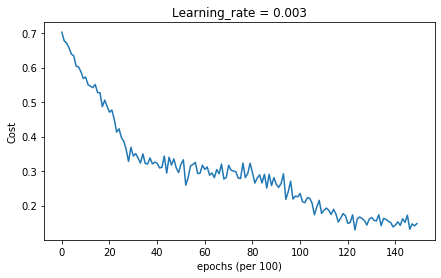

Accuracy: 0.9333333333333333


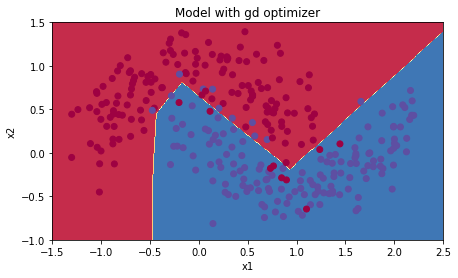

In [188]:
layer_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layer_dims, num_epochs = 15000, learning_rate = 0.003, optimizer = "gd")
                   
predictions = predict(train_X, train_Y, parameters)     

#plotting decision boundary
plt.title("Model with gd optimizer")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

***Mini batch with Adam mode*** 

Cost after epoch 0: 0.702412
Cost after epoch 1000: 0.547884
Cost after epoch 2000: 0.368741
Cost after epoch 3000: 0.321809
Cost after epoch 4000: 0.306536
Cost after epoch 5000: 0.309444
Cost after epoch 6000: 0.283588
Cost after epoch 7000: 0.272902
Cost after epoch 8000: 0.209587
Cost after epoch 9000: 0.165814


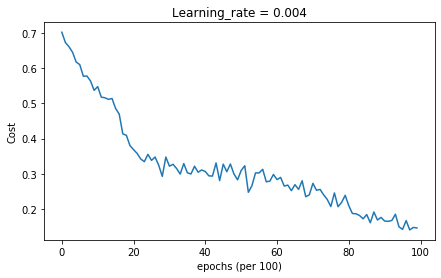

Accuracy: 0.9333333333333333


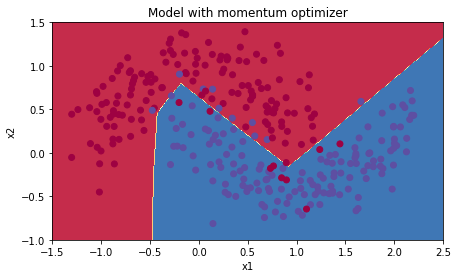

In [189]:
layer_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layer_dims, optimizer = "momentum")

predictions = predict(train_X, train_Y, parameters)     

#plotting decision boundary
plt.title("Model with momentum optimizer")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after epoch 0: 0.701095
Cost after epoch 1000: 0.117635
Cost after epoch 2000: 0.130581
Cost after epoch 3000: 0.137092
Cost after epoch 4000: 0.136657
Cost after epoch 5000: 0.115947
Cost after epoch 6000: 0.124106
Cost after epoch 7000: 0.136077
Cost after epoch 8000: 0.135905
Cost after epoch 9000: 0.123867


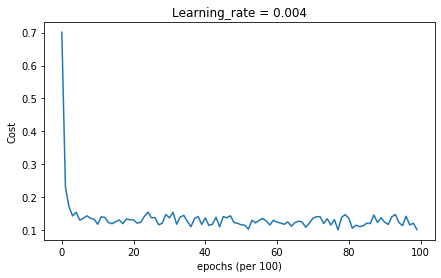

Accuracy: 0.9333333333333333


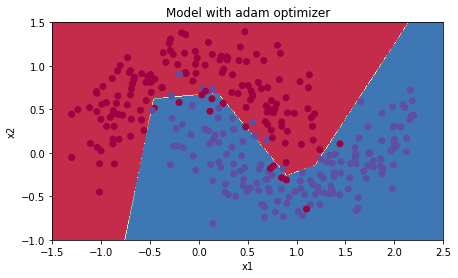

In [190]:
layer_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layer_dims, optimizer = "adam")

predictions = predict(train_X, train_Y, parameters)     

#plotting decision boundary
plt.title("Model with adam optimizer")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

#### SUMMARY

In this example the momentum optimization isnot doing very much because of the simplicity of the dataset.Huge oscillations in the cost are because some mini_batches are usually harder to learn for the optimization algorithm.

Adam outperforms gradient_descent and Momentum.If model is run for more epochs

Advantages of adam optimizer.

1. requires relatively low memory generally higher than gradient_descent and gradient_descent with momentum

2. works well even with a little hyperparameter tuning (except the hyperparameter alpha)